In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import librosa

In [6]:
with open('Speech_C1_t14_s2.csv', mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            print(f'Frequencies recorded are {", ".join(row)}')
            line_count += 1
        line_count += 1
    print(f'Processed {line_count} lines.')

Frequencies recorded are -14, -16, -19, -20, -17, -15, -12, -4, 0, 5, 7, 1, -2, -3, -5, -6, 3, 13, 19, 15, 14, 12, 4, -1, -8, -13, -7, 8, 6, 11, 18, 21, 20, 17, 9, 10, 16, -11, 2, -9, -18, 26, 23, 25, 28, 29, -21, -24, -29, -33, -36, -34, -31, -23, 27, 31, 30, -10, 24, 35, 37, 38, 34, -22, -27, -26, -25, -35, -28, 22, -30, -41, -38, 36, -32, 32, 33, 39, 45, 49, 50, 46, 47, 42, -43, -47, -52, -57, -59, -62, -63, -66, -70, -68, -65, -61, -60, -55, -54, -50, -45, 56, 59, 62, 67, 70, 72, 69, 66, 65, 68, 64, 63, 61, 60, 54, 43, -39, -40, -48, -53, -51, -49, -42, -73, -80, -86, -89, -93, -94, -91, -90, -82, -74, -69, -56, 53, 76, 80, 85, 87, 90, 95, 96, 97, 98, 94, 91, 89, 88, 81, 82, 84, 77, 55, -46, -71, -72, -75, -81, -84, -85, -87, -96, -104, -111, -116, -122, -125, -128, -131, -132, -136, -123, -118, -113, -97, -77, -64, 51, 79, 93, 99, 103, 107, 108, 109, 112, 117, 119, 123, 129, 130, 128, 127, 126, 122, 116, 104, 101, 86, 75, 48, 41, -78, -83, -98, -106, -115, -119, -127, -140, -148, 

In [14]:
file_path = "/Users/rilee/Documents/!Research/LIINC/Communication Analysis/Speech_C1_t14s1.wav"
samples, sampling_rate = librosa.load(file_path, sr = None, mono = True, offset = 0.0, duration = None)

len(samples), sampling_rate

duration = len(samples) / sampling_rate
print(duration)

2225.04


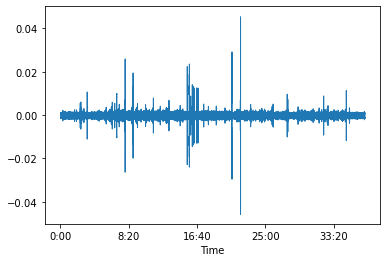

In [15]:
from librosa import display
librosa.display.waveshow(y = samples, sr = sampling_rate, x_axis = 'time')

In [17]:
import scipy
def fft_plot(audio, sampling_rate):
    n = len(audio)
    T = 1/sampling_rate
    yf = scipy.fft(audio)
    xf = np.linspace(0.0, 1.0/(2.0*T), n/2)
    fig, ax = plt.subplots()
    ax.plot(xf, 2.0/n*np.abs(yf[:n//2]))
    plt.grid()
    plt.xlabel("Frequency (Hz) -->")
    plt.ylabel("Magnitude")
    return plt.show

In [24]:
S = np.abs(librosa.stft(samples))
S_left = librosa.stft(samples, center = False)
D_short = librosa.stft(samples, hop_length = 64)

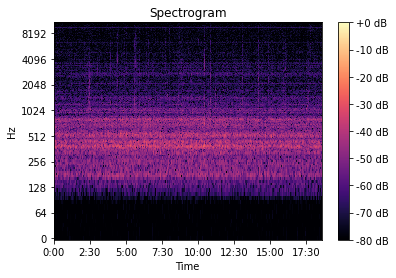

In [26]:
fig, ax = plt.subplots()

img = librosa.display.specshow(librosa.amplitude_to_db(S, ref = np.max), y_axis = 'log', x_axis = 'time', ax = ax)
ax.set_title("Spectrogram")
fig.colorbar(img, ax=ax, format="%+2.0f dB")
plt.savefig('C1_t14s1 spec.png')